In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.stats.multitest
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
clinical = CPTAC.get_clinical()

msi_status = clinical['MSI_status']

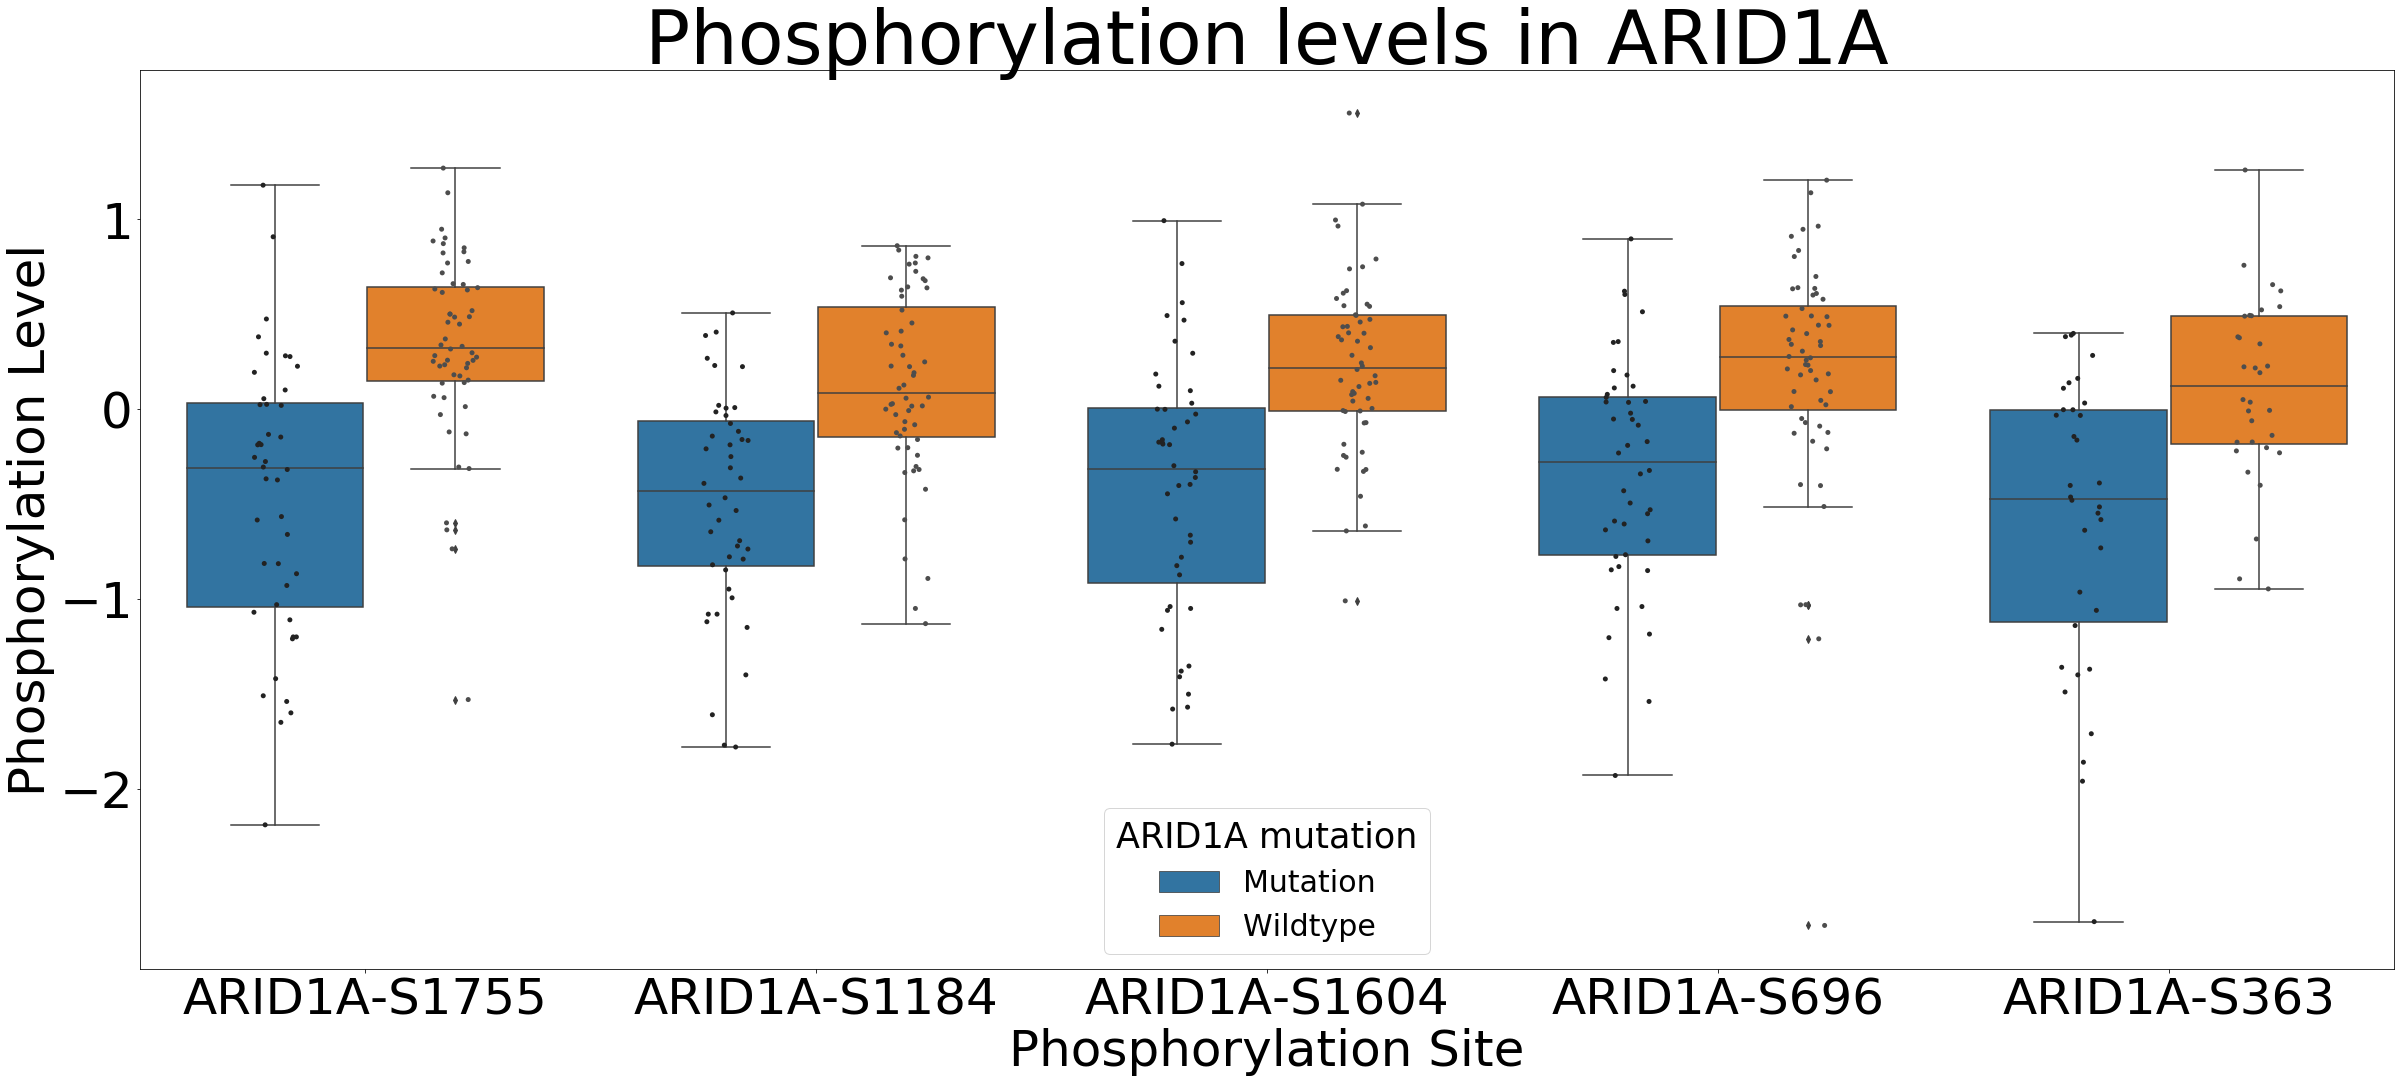

In [10]:
gene = 'ARID1A'
prot = 'ARID1A'

genedf = CPTAC.compare_mutations(phos, prot, gene)

p_val_dict = {}
siteList = []

'''Make a list of all sites with the associated protein'''
for colName in genedf:
    if colName != "Mutation" and colName != "Patient_Type":
        siteList.append(colName)


'''Do a t-test on each site, comparing mutated vs wildtype phosphorylation levels'''
for site in siteList:
    phosdf = CPTAC.compare_mutations(phos, site, gene)
    phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1).dropna()
    #print(phosdf)
    mutateddf = phosdf.loc[phosdf['Mutation'] != 'Wildtype']
    wtdf = phosdf.loc[phosdf['Mutation'] == 'Wildtype']
    ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
    p_val_dict[site] = ttest[1]   
#print(p_val_dict)

'''Remove nan p-values'''
for key in list(p_val_dict.keys()):
    if np.isnan(p_val_dict[key]):
        del p_val_dict[key]
        

'''Sort the dictionary for most significant p-values'''
sorted_dict = dict(sorted(p_val_dict.items(), key=lambda kv: kv[1]))
#print(sorted_dict)


'''Get the 5 most significant sites'''
five_most_sig_sites = []
for key in sorted_dict.keys():
    five_most_sig_sites.append(key)
five_most_sig_sites = five_most_sig_sites[:5]
#print(five_most_sig_sites)


'''Make a dataframe showing phosphorylation levels at these 5 sites, comparing mutated vs wildtype'''
plotdf = CPTAC.compare_mutations(phos, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation']]
for site in five_most_sig_sites:
    pdf = CPTAC.compare_mutations(phos, site, gene)[[site]]
    #print(proteindf)
    plotdf = plotdf.join(pdf)


'''Make all mutations read "mutation", to compare with wildtype'''
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'Splice_Site' : 'Mutation',
                                      'In_Frame_Del' : 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Missense_Mutation': 'Mutation'
                                     }})
    
'''Reformat dataframe to plot'''
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Site', value_name='Phosphorylation')
plotdf = plotdf.dropna(axis=0)
#print(plotdf)

'''plot data'''
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
boxplt = sns.boxplot(x='Site', y='Phosphorylation', hue='Mutation', data=plotdf)
boxplt = sns.stripplot(data=plotdf, x='Site', y='Phosphorylation', hue='Mutation', dodge=True, jitter=True, color='.3')

boxplt.set_xlabel('Phosphorylation Site', fontsize='50')
boxplt.set_ylabel('Phosphorylation Level', fontsize='50')
boxplt.tick_params(labelsize='50')
boxplt.set_title('Phosphorylation levels in ' + gene, fontsize = '75')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2],labels[0:2],title=gene + ' mutation', fontsize='30')
boxplt.get_legend().get_title().set_fontsize('35')

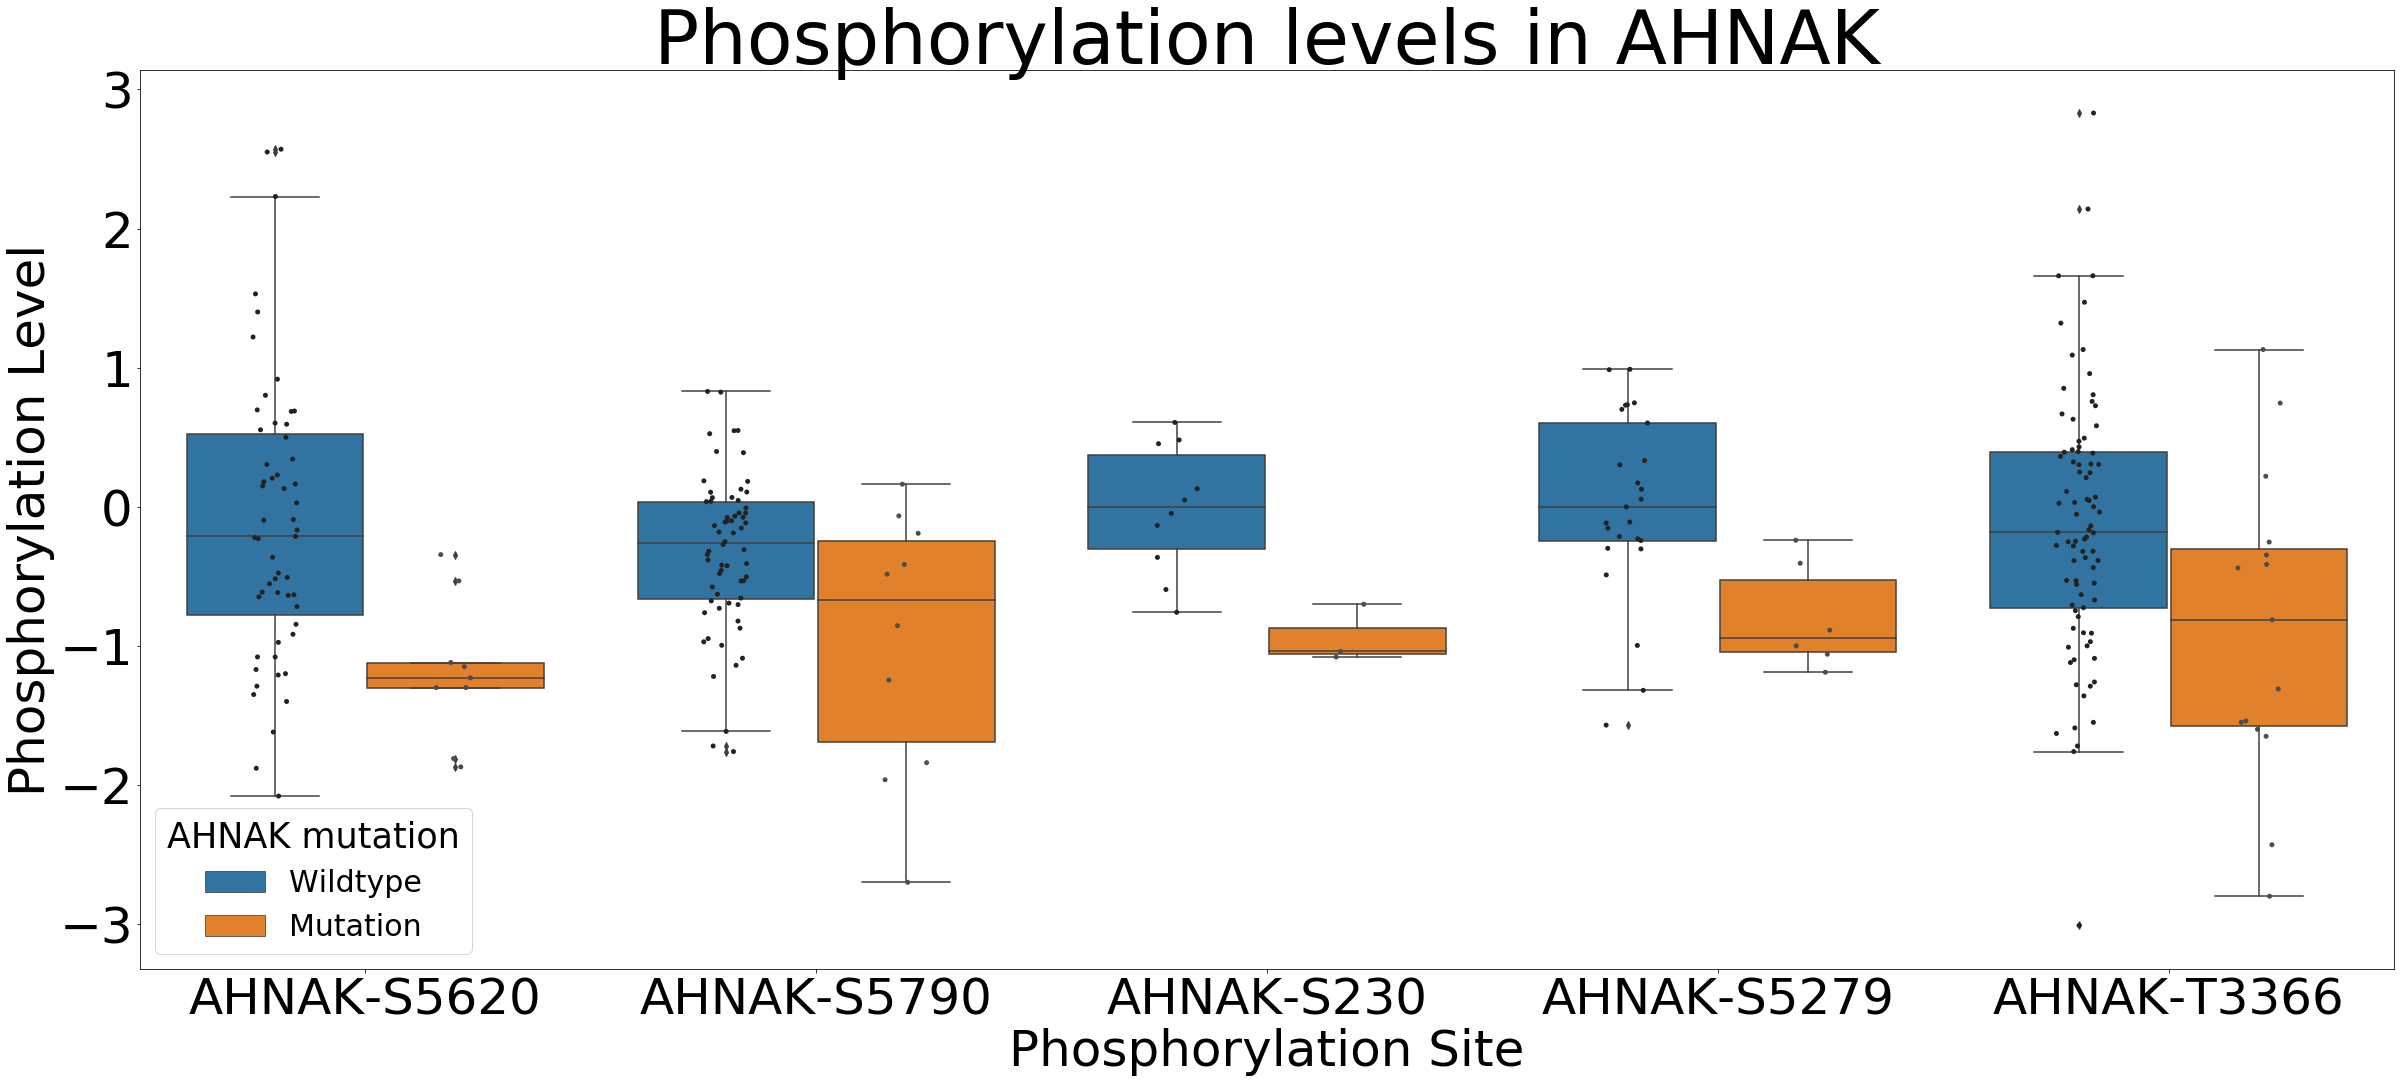

In [11]:
gene = 'AHNAK'
prot = 'AHNAK'

genedf = CPTAC.compare_mutations(phos, prot, gene)

p_val_dict = {}
siteList = []

'''Make a list of all sites with the associated protein'''
for colName in genedf:
    if colName != "Mutation" and colName != "Patient_Type":
        siteList.append(colName)


'''Do a t-test on each site, comparing mutated vs wildtype phosphorylation levels'''
for site in siteList:
    phosdf = CPTAC.compare_mutations(phos, site, gene)
    phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1).dropna()
    #print(phosdf)
    mutateddf = phosdf.loc[phosdf['Mutation'] != 'Wildtype']
    wtdf = phosdf.loc[phosdf['Mutation'] == 'Wildtype']
    ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
    p_val_dict[site] = ttest[1]   
#print(p_val_dict)

'''Remove nan p-values'''
for key in list(p_val_dict.keys()):
    if np.isnan(p_val_dict[key]):
        del p_val_dict[key]
        

'''Sort the dictionary for most significant p-values'''
sorted_dict = dict(sorted(p_val_dict.items(), key=lambda kv: kv[1]))
#print(sorted_dict)


'''Get the 5 most significant sites'''
five_most_sig_sites = []
for key in sorted_dict.keys():
    five_most_sig_sites.append(key)
five_most_sig_sites = five_most_sig_sites[:5]
#print(five_most_sig_sites)


'''Make a dataframe showing phosphorylation levels at these 5 sites, comparing mutated vs wildtype'''
plotdf = CPTAC.compare_mutations(phos, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation']]
for site in five_most_sig_sites:
    pdf = CPTAC.compare_mutations(phos, site, gene)[[site]]
    #print(proteindf)
    plotdf = plotdf.join(pdf)


'''Make all mutations read "mutation", to compare with wildtype'''
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'Splice_Site' : 'Mutation',
                                      'In_Frame_Del' : 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Missense_Mutation': 'Mutation'
                                     }})
    
'''Reformat dataframe to plot'''
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Site', value_name='Phosphorylation')
plotdf = plotdf.dropna(axis=0)
#print(plotdf)

'''Plot data'''
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
boxplt = sns.boxplot(x='Site', y='Phosphorylation', hue='Mutation', data=plotdf)
boxplt = sns.stripplot(data=plotdf, x='Site', y='Phosphorylation', hue='Mutation', dodge=True, jitter=True, color='.3')

boxplt.set_xlabel('Phosphorylation Site', fontsize='50')
boxplt.set_ylabel('Phosphorylation Level', fontsize='50')
boxplt.tick_params(labelsize='50')
boxplt.set_title('Phosphorylation levels in ' + gene, fontsize = '75')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2],labels[0:2],title=gene + ' mutation', fontsize='30')
boxplt.get_legend().get_title().set_fontsize('35')


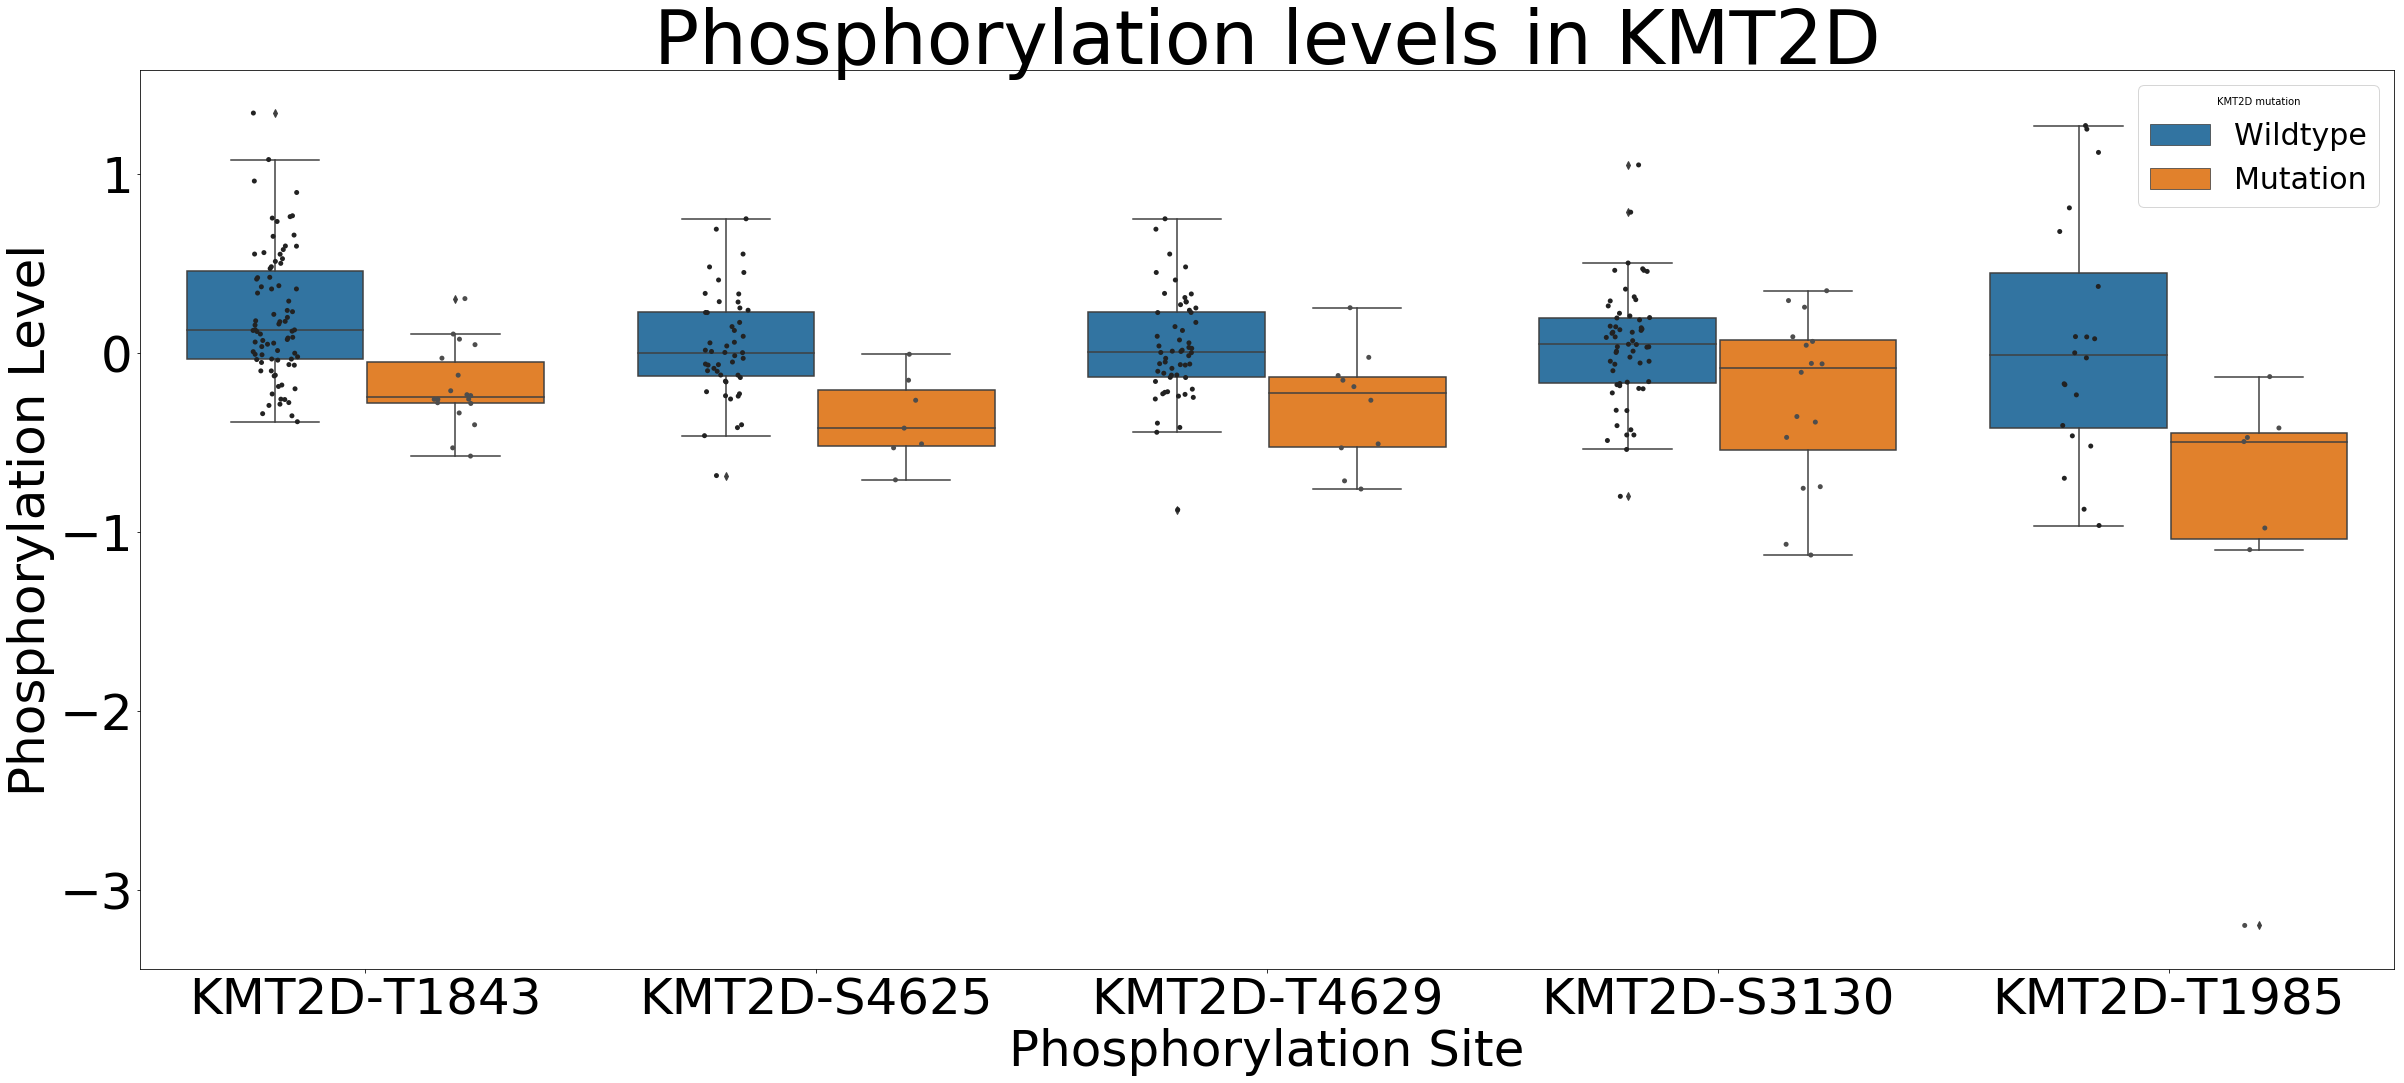

In [12]:
gene = 'KMT2D'
prot = 'KMT2D'

genedf = CPTAC.compare_mutations(phos, prot, gene)

p_val_dict = {}
siteList = []

'''Make a list of all sites with the associated protein'''
for colName in genedf:
    if colName != "Mutation" and colName != "Patient_Type":
        siteList.append(colName)


'''Do a t-test on each site, comparing mutated vs wildtype phosphorylation levels'''
for site in siteList:
    phosdf = CPTAC.compare_mutations(phos, site, gene)
    phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1).dropna()
    #print(phosdf)
    mutateddf = phosdf.loc[phosdf['Mutation'] != 'Wildtype']
    wtdf = phosdf.loc[phosdf['Mutation'] == 'Wildtype']
    ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
    p_val_dict[site] = ttest[1]   
#print(p_val_dict)

'''Remove nan p-values'''
for key in list(p_val_dict.keys()):
    if np.isnan(p_val_dict[key]):
        del p_val_dict[key]
        

'''Sort the dictionary for most significant p-values'''
sorted_dict = dict(sorted(p_val_dict.items(), key=lambda kv: kv[1]))
#print(sorted_dict)


'''Get the 5 most significant sites'''
five_most_sig_sites = []
for key in sorted_dict.keys():
    five_most_sig_sites.append(key)
five_most_sig_sites = five_most_sig_sites[:5]
#print(five_most_sig_sites)


'''Make a dataframe showing phosphorylation levels at these 5 sites, comparing mutated vs wildtype'''
plotdf = CPTAC.compare_mutations(phos, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation']]
for site in five_most_sig_sites:
    pdf = CPTAC.compare_mutations(phos, site, gene)[[site]]
    #print(proteindf)
    plotdf = plotdf.join(pdf)


'''Make all mutations read "mutation", to compare with wildtype'''
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'Splice_Site' : 'Mutation',
                                      'In_Frame_Del' : 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Missense_Mutation': 'Mutation'
                                     }})
    
'''Reformat dataframe to plot'''
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Site', value_name='Phosphorylation')
plotdf = plotdf.dropna(axis=0)
#print(plotdf)

'''Plot data'''
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
boxplt = sns.boxplot(x='Site', y='Phosphorylation', hue='Mutation', data=plotdf)
boxplt = sns.stripplot(data=plotdf, x='Site', y='Phosphorylation', hue='Mutation', dodge=True, jitter=True, color='.3')

boxplt.set_xlabel('Phosphorylation Site', fontsize='50')
boxplt.set_ylabel('Phosphorylation Level', fontsize='50')
boxplt.tick_params(labelsize='50')
boxplt.set_title('Phosphorylation levels in ' + gene, fontsize = '75')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2],labels[0:2],title=gene + ' mutation', fontsize='30')

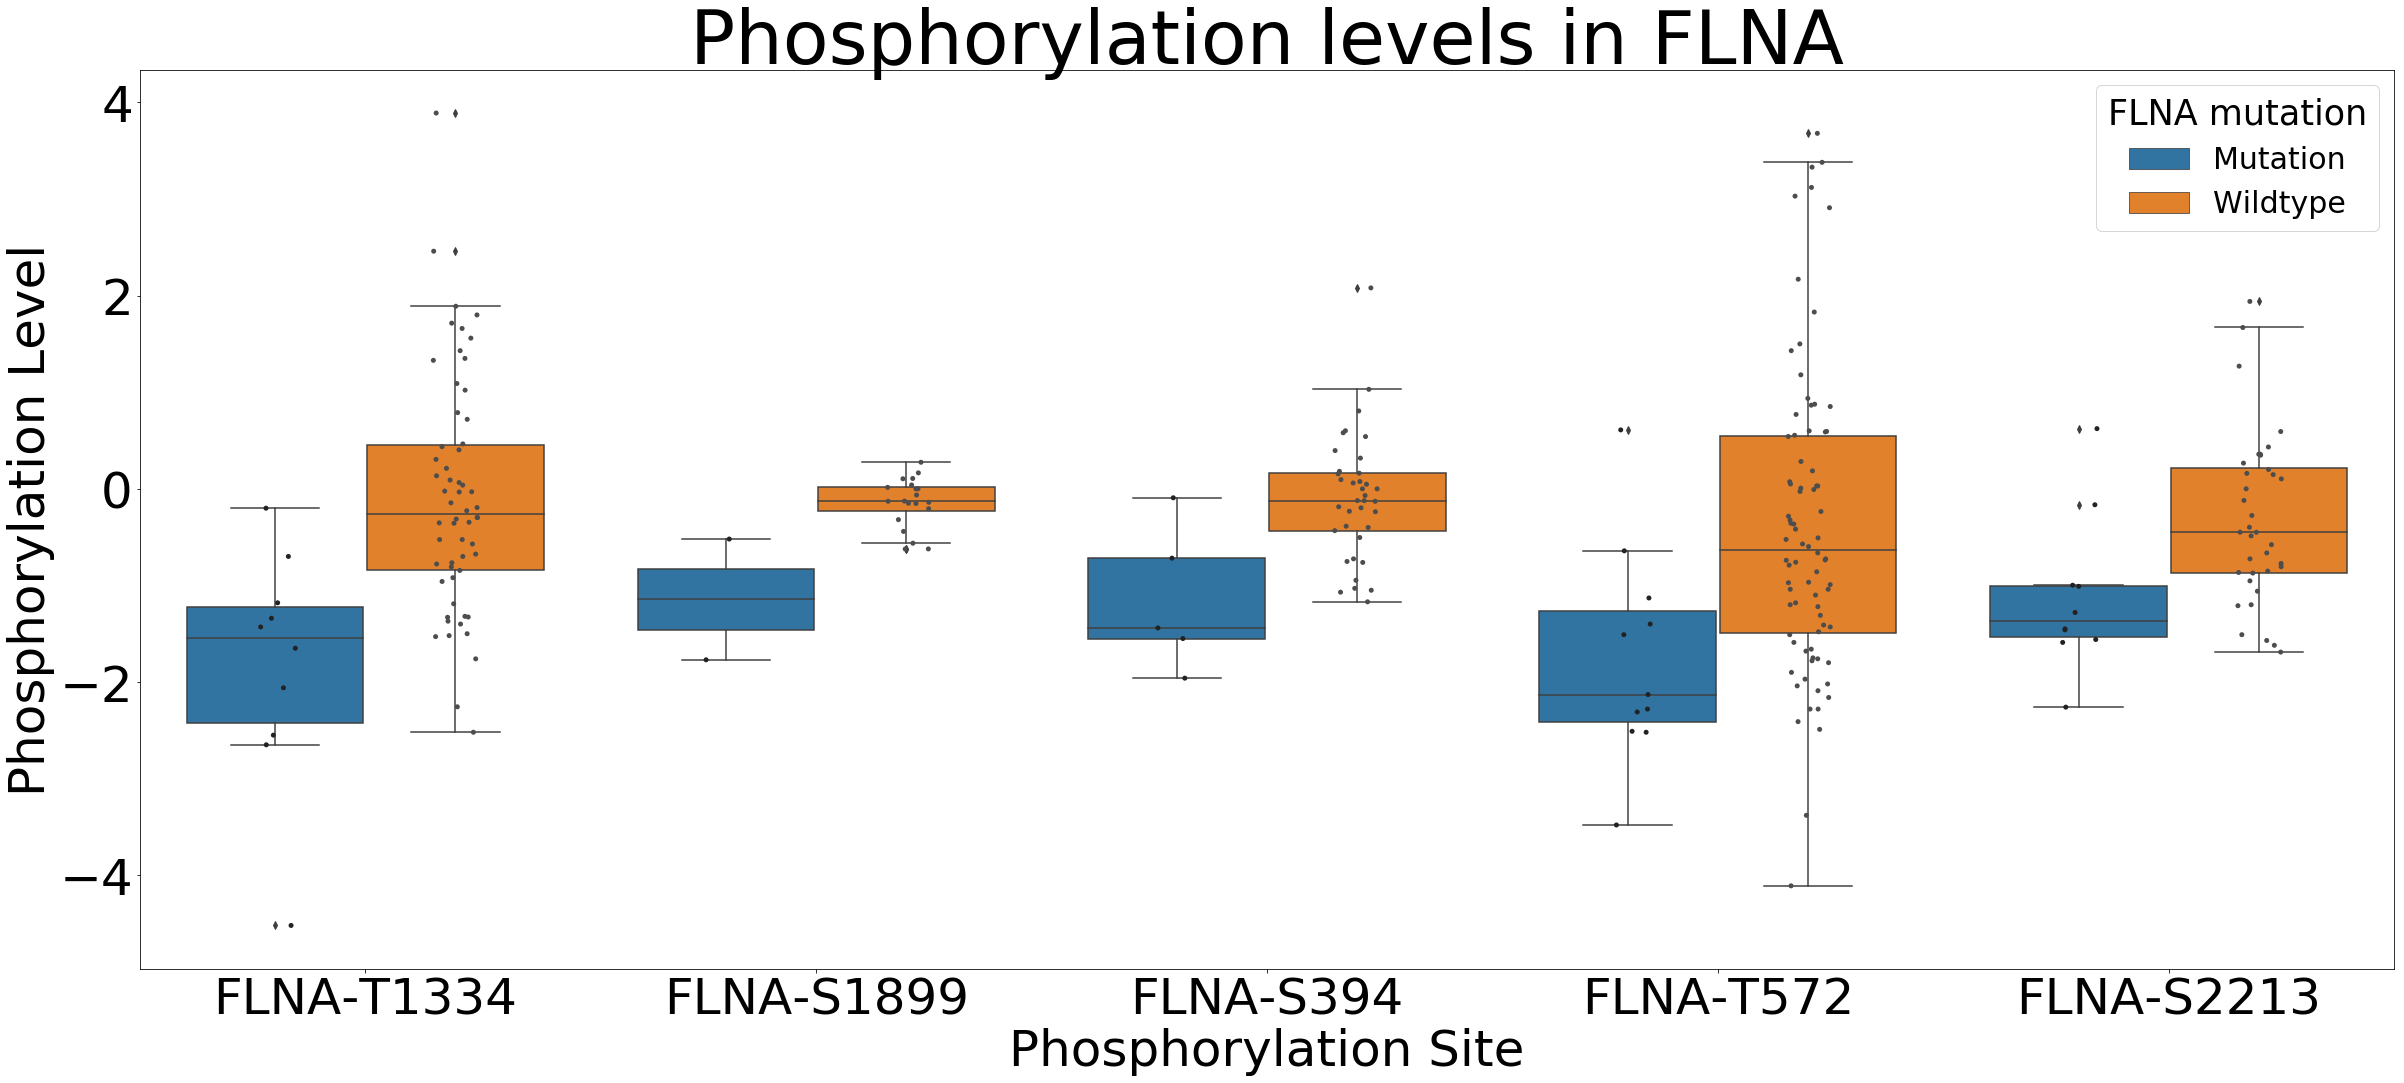

In [13]:
gene = 'FLNA'
prot = 'FLNA'

genedf = CPTAC.compare_mutations(phos, prot, gene)

p_val_dict = {}
siteList = []

'''Make a list of all sites with the associated protein'''
for colName in genedf:
    if colName != "Mutation" and colName != "Patient_Type":
        siteList.append(colName)


'''Do a t-test on each site, comparing mutated vs wildtype phosphorylation levels'''
for site in siteList:
    phosdf = CPTAC.compare_mutations(phos, site, gene)
    phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1).dropna()
    #print(phosdf)
    mutateddf = phosdf.loc[phosdf['Mutation'] != 'Wildtype']
    wtdf = phosdf.loc[phosdf['Mutation'] == 'Wildtype']
    ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
    p_val_dict[site] = ttest[1]   
#print(p_val_dict)

'''Remove nan p-values'''
for key in list(p_val_dict.keys()):
    if np.isnan(p_val_dict[key]):
        del p_val_dict[key]
        

'''Sort the dictionary for most significant p-values'''
sorted_dict = dict(sorted(p_val_dict.items(), key=lambda kv: kv[1]))
#print(sorted_dict)


'''Get the 5 most significant sites'''
five_most_sig_sites = []
for key in sorted_dict.keys():
    five_most_sig_sites.append(key)
five_most_sig_sites = five_most_sig_sites[:5]
#print(five_most_sig_sites)


'''Make a dataframe showing phosphorylation levels at these 5 sites, comparing mutated vs wildtype'''
plotdf = CPTAC.compare_mutations(phos, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation']]
for site in five_most_sig_sites:
    pdf = CPTAC.compare_mutations(phos, site, gene)[[site]]
    #print(proteindf)
    plotdf = plotdf.join(pdf)


'''Make all mutations read "mutation", to compare with wildtype'''
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'Splice_Site' : 'Mutation',
                                      'In_Frame_Del' : 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Missense_Mutation': 'Mutation'
                                     }})
    
'''Reformat dataframe to plot'''
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Site', value_name='Phosphorylation')
plotdf = plotdf.dropna(axis=0)
#print(plotdf)

'''Plot data'''
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
boxplt = sns.boxplot(x='Site', y='Phosphorylation', hue='Mutation', data=plotdf)
boxplt = sns.stripplot(data=plotdf, x='Site', y='Phosphorylation', hue='Mutation', dodge=True, jitter=True, color='.3')

boxplt.set_xlabel('Phosphorylation Site', fontsize='50')
boxplt.set_ylabel('Phosphorylation Level', fontsize='50')
boxplt.tick_params(labelsize='50')
boxplt.set_title('Phosphorylation levels in ' + gene, fontsize = '75')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2],labels[0:2],title=gene + ' mutation', fontsize='30')
boxplt.get_legend().get_title().set_fontsize('35')

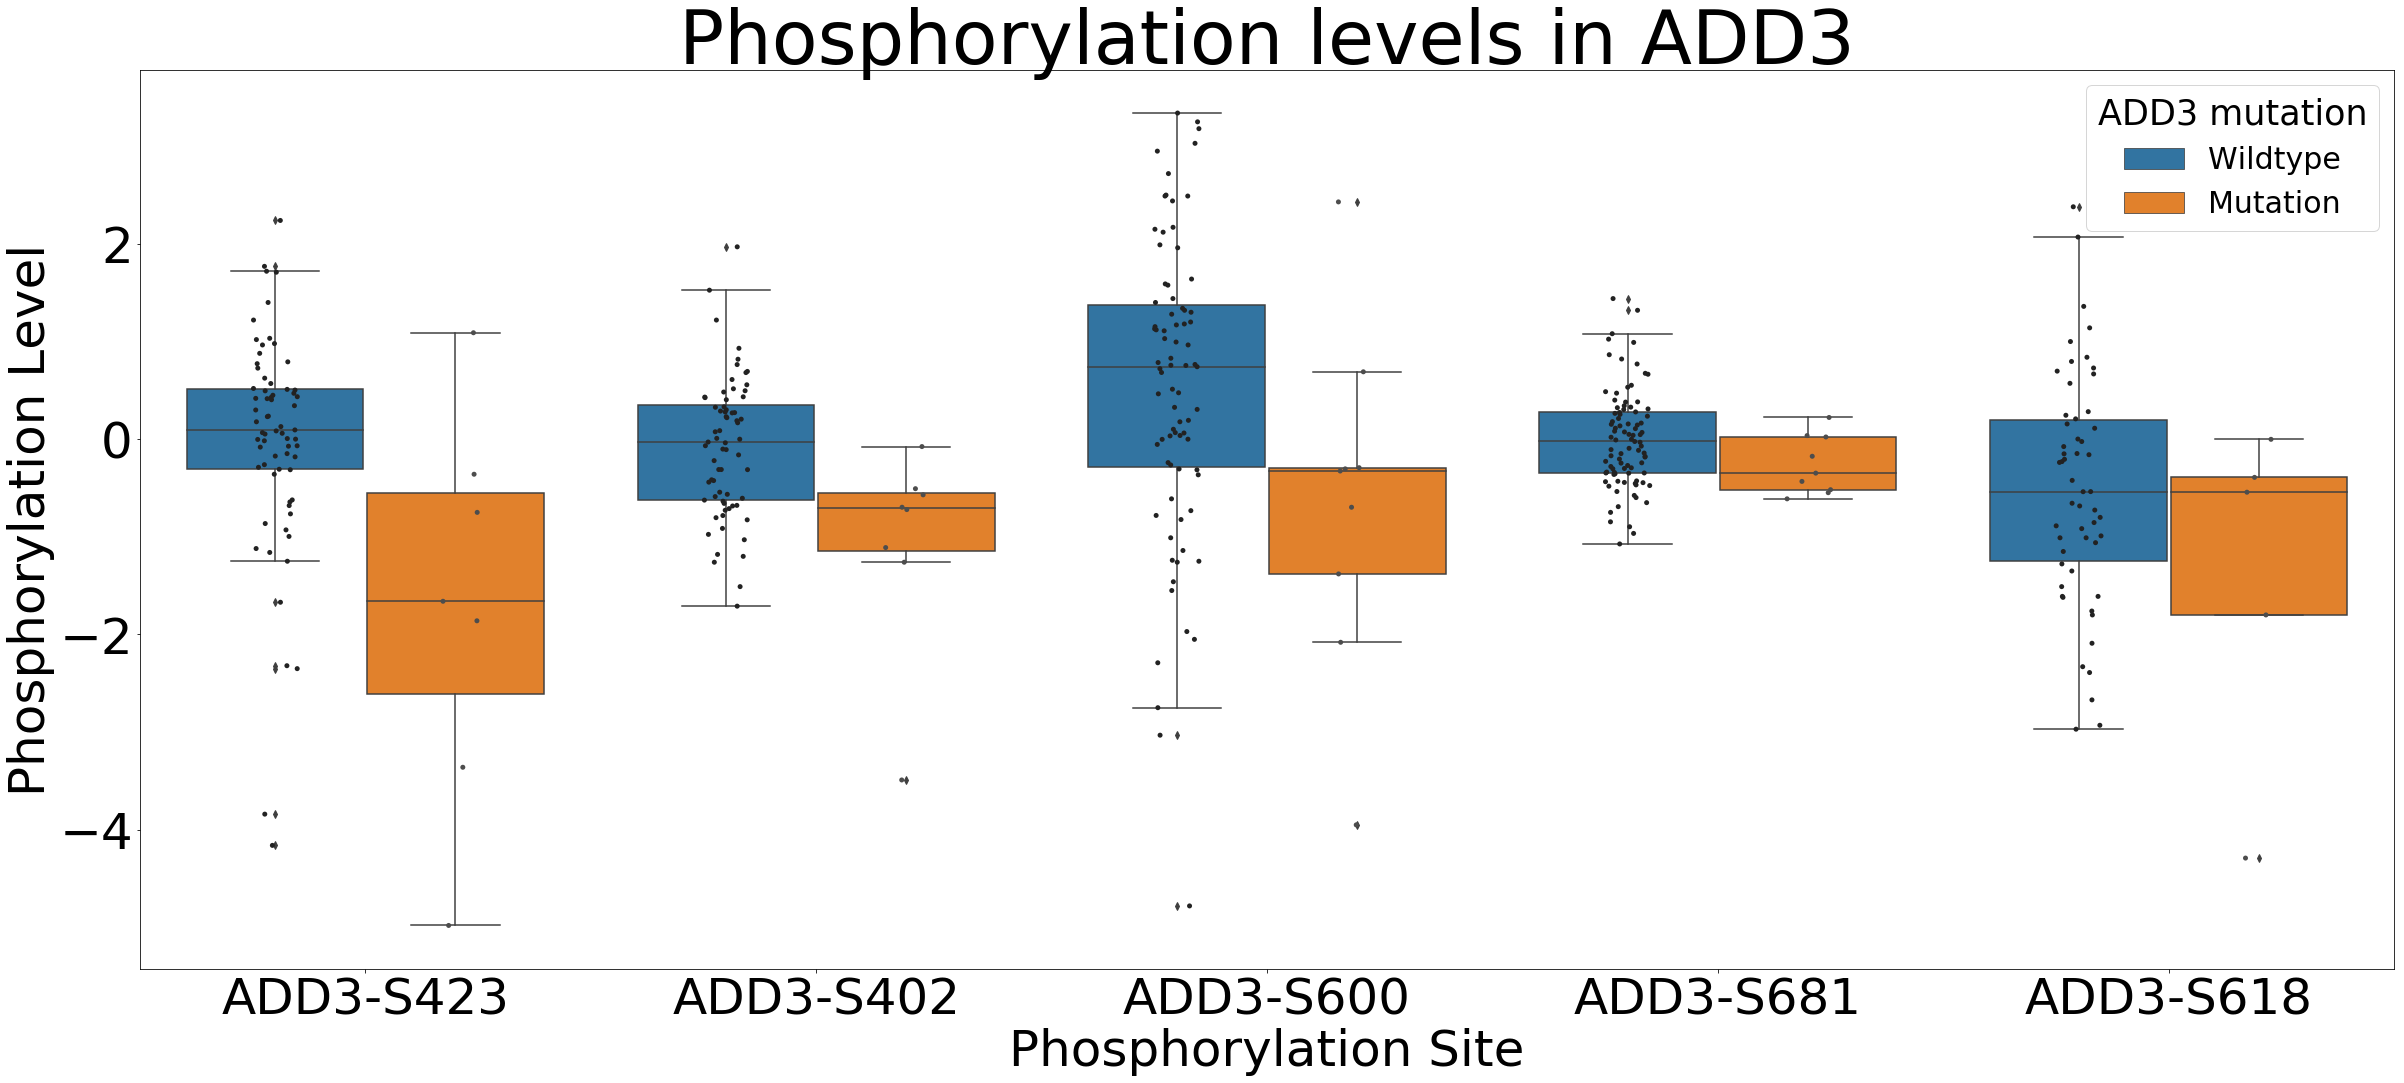

In [14]:
gene = 'ADD3'
prot = 'ADD3'

genedf = CPTAC.compare_mutations(phos, prot, gene)

p_val_dict = {}
siteList = []

'''Make a list of all sites with the associated protein'''
for colName in genedf:
    if colName != "Mutation" and colName != "Patient_Type":
        siteList.append(colName)


'''Do a t-test on each site, comparing mutated vs wildtype phosphorylation levels'''
for site in siteList:
    phosdf = CPTAC.compare_mutations(phos, site, gene)
    phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1).dropna()
    #print(phosdf)
    mutateddf = phosdf.loc[phosdf['Mutation'] != 'Wildtype']
    wtdf = phosdf.loc[phosdf['Mutation'] == 'Wildtype']
    ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
    p_val_dict[site] = ttest[1]   
#print(p_val_dict)

'''Remove nan p-values'''
for key in list(p_val_dict.keys()):
    if np.isnan(p_val_dict[key]):
        del p_val_dict[key]
        

'''Sort the dictionary for most significant p-values'''
sorted_dict = dict(sorted(p_val_dict.items(), key=lambda kv: kv[1]))
#print(sorted_dict)


'''Get the 5 most significant sites'''
five_most_sig_sites = []
for key in sorted_dict.keys():
    five_most_sig_sites.append(key)
five_most_sig_sites = five_most_sig_sites[:5]
#print(five_most_sig_sites)


'''Make a dataframe showing phosphorylation levels at these 5 sites, comparing mutated vs wildtype'''
plotdf = CPTAC.compare_mutations(phos, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation']]
for site in five_most_sig_sites:
    pdf = CPTAC.compare_mutations(phos, site, gene)[[site]]
    #print(proteindf)
    plotdf = plotdf.join(pdf)


'''Make all mutations read "mutation", to compare with wildtype'''
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'Splice_Site' : 'Mutation',
                                      'In_Frame_Del' : 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Missense_Mutation': 'Mutation'
                                     }})
    
'''Reformat dataframe to plot'''
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Site', value_name='Phosphorylation')
plotdf = plotdf.dropna(axis=0)
#print(plotdf)

'''Plot data'''
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
boxplt = sns.boxplot(x='Site', y='Phosphorylation', hue='Mutation', data=plotdf)
boxplt = sns.stripplot(data=plotdf, x='Site', y='Phosphorylation', hue='Mutation', dodge=True, jitter=True, color='.3')

boxplt.set_xlabel('Phosphorylation Site', fontsize='50')
boxplt.set_ylabel('Phosphorylation Level', fontsize='50')
boxplt.tick_params(labelsize='50')
boxplt.set_title('Phosphorylation levels in ' + gene, fontsize = '75')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2],labels[0:2],title=gene + ' mutation', fontsize='30')
boxplt.get_legend().get_title().set_fontsize('35')

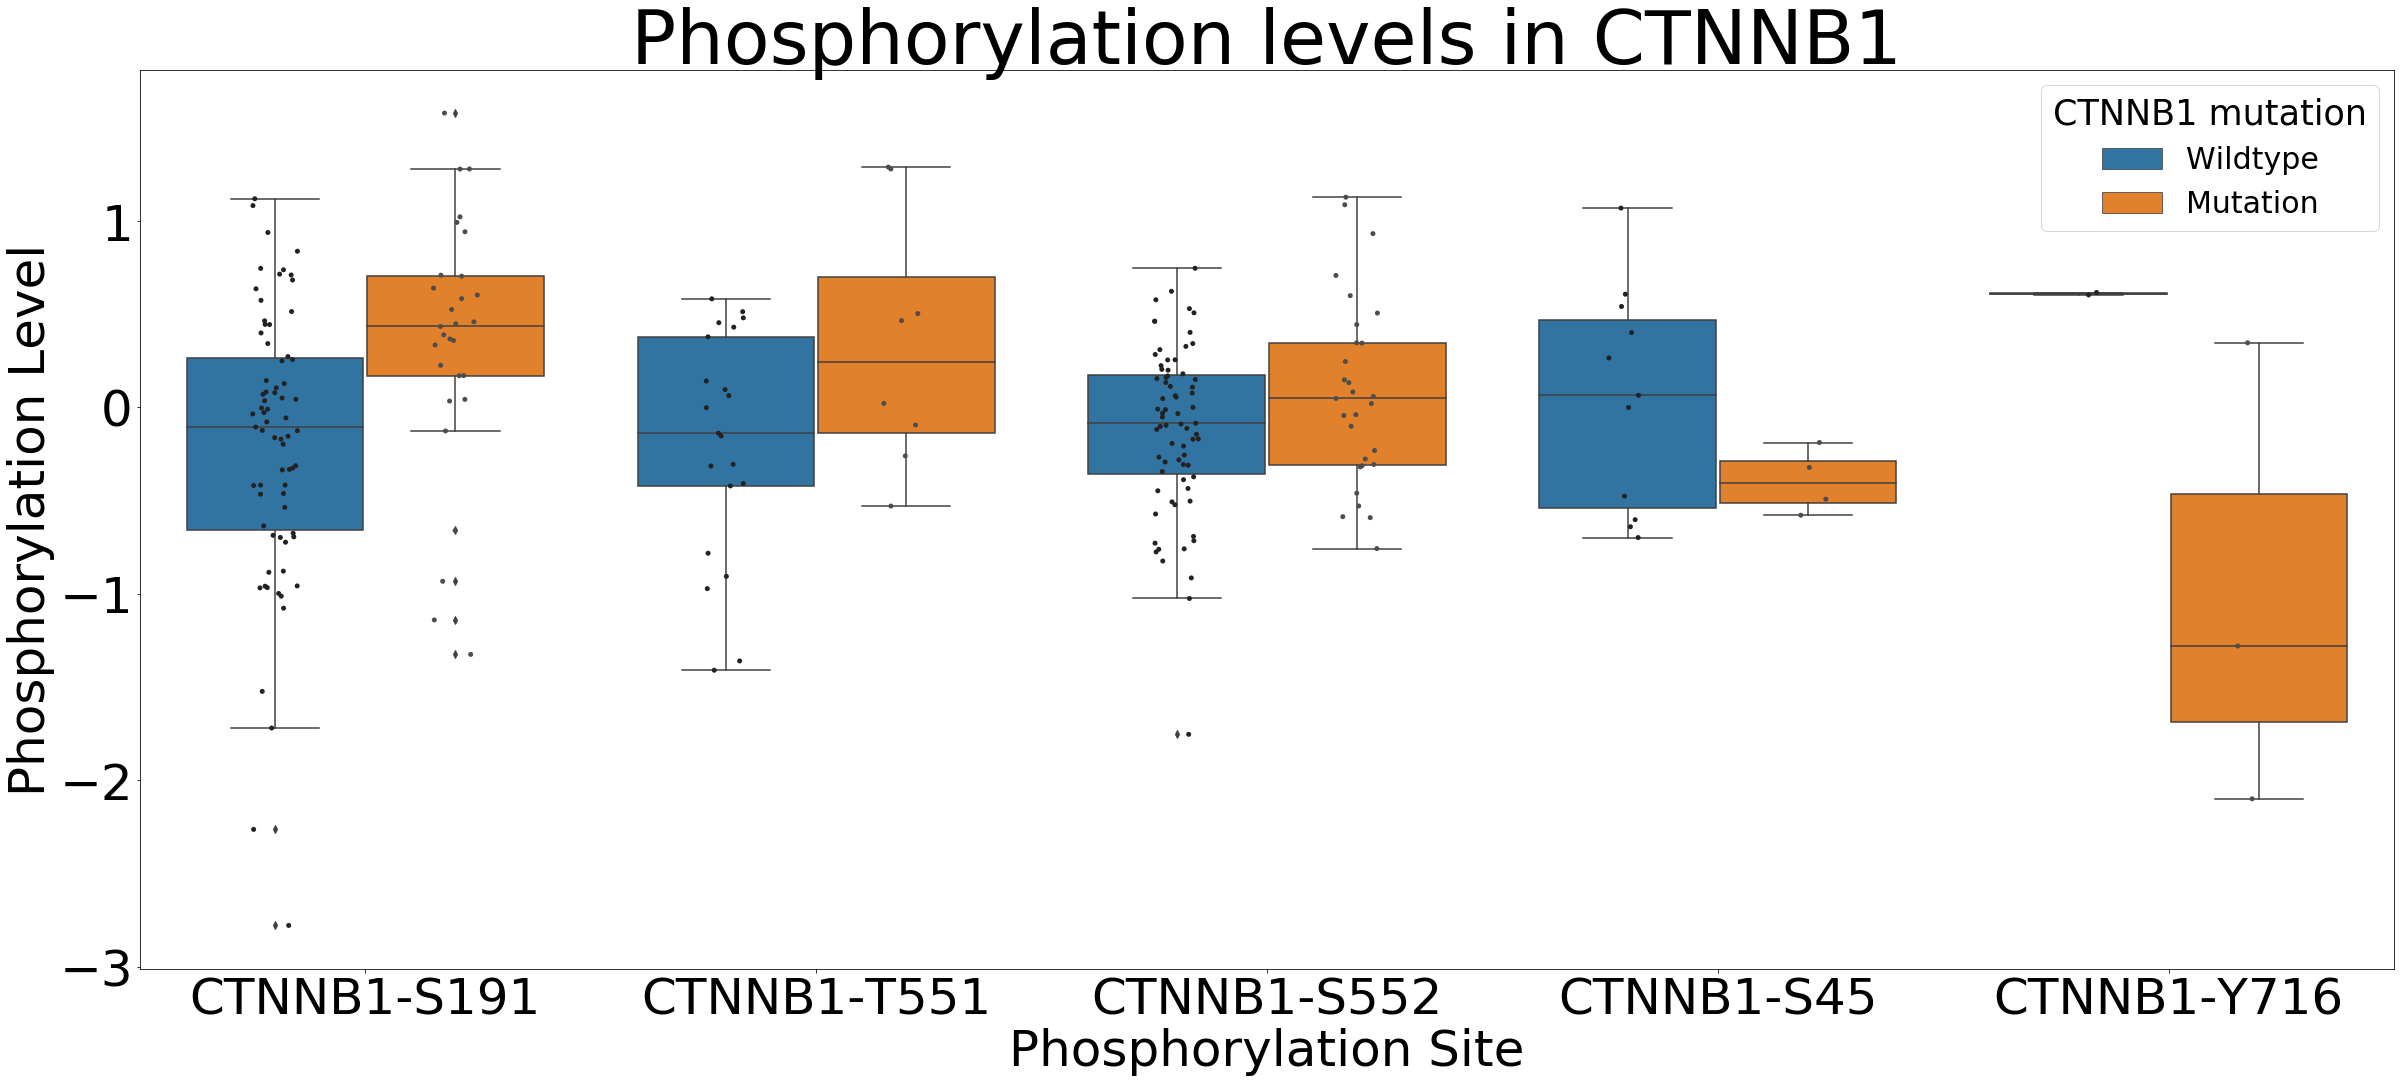

In [15]:
gene = 'CTNNB1'
prot = 'CTNNB1'

genedf = CPTAC.compare_mutations(phos, prot, gene)

p_val_dict = {}
siteList = []

'''Make a list of all sites with the associated protein'''
for colName in genedf:
    if colName != "Mutation" and colName != "Patient_Type":
        siteList.append(colName)


'''Do a t-test on each site, comparing mutated vs wildtype phosphorylation levels'''
for site in siteList:
    phosdf = CPTAC.compare_mutations(phos, site, gene)
    phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1).dropna()
    #print(phosdf)
    mutateddf = phosdf.loc[phosdf['Mutation'] != 'Wildtype']
    wtdf = phosdf.loc[phosdf['Mutation'] == 'Wildtype']
    ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
    p_val_dict[site] = ttest[1]   
#print(p_val_dict)

'''Remove nan p-values'''
for key in list(p_val_dict.keys()):
    if np.isnan(p_val_dict[key]):
        del p_val_dict[key]
        

'''Sort the dictionary for most significant p-values'''
sorted_dict = dict(sorted(p_val_dict.items(), key=lambda kv: kv[1]))
#print(sorted_dict)


'''Get the 5 most significant sites'''
five_most_sig_sites = []
for key in sorted_dict.keys():
    five_most_sig_sites.append(key)
five_most_sig_sites = five_most_sig_sites[:5]
#print(five_most_sig_sites)


'''Make a dataframe showing phosphorylation levels at these 5 sites, comparing mutated vs wildtype'''
plotdf = CPTAC.compare_mutations(phos, gene)
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation']]
for site in five_most_sig_sites:
    pdf = CPTAC.compare_mutations(phos, site, gene)[[site]]
    #print(proteindf)
    plotdf = plotdf.join(pdf)


'''Make all mutations read "mutation", to compare with wildtype'''
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'Splice_Site' : 'Mutation',
                                      'In_Frame_Del' : 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Missense_Mutation': 'Mutation'
                                     }})
    
'''Reformat dataframe to plot'''
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Site', value_name='Phosphorylation')
plotdf = plotdf.dropna(axis=0)
#print(plotdf)

'''Plot data'''
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
boxplt = sns.boxplot(x='Site', y='Phosphorylation', hue='Mutation', data=plotdf)
boxplt = sns.stripplot(data=plotdf, x='Site', y='Phosphorylation', hue='Mutation', dodge=True, jitter=True, color='.3')

boxplt.set_xlabel('Phosphorylation Site', fontsize='50')
boxplt.set_ylabel('Phosphorylation Level', fontsize='50')
boxplt.tick_params(labelsize='50')
boxplt.set_title('Phosphorylation levels in ' + gene, fontsize = '75')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2],labels[0:2],title=gene + ' mutation', fontsize='30')
boxplt.get_legend().get_title().set_fontsize('35')